# Лабораторная работа №7. Классификация

Выполните следующие задания:

1. Откройте в файл в Google Colab (используйте собственный форк репозитория).
2. Решите задачи.
3. Сохраните результат в виде файла rep.ipynb в ваш репозиторий github в директорию ./les07
4. Создайте pull request в репозиторий https://github.com/chebotarevsa/dap-2024. Название pull request должно иметь формат "<Номер лабораторной работы>  <Номер группы> <ФИО>"
5. Сдайте работу в системе "Пегас", в отчет укажите ссылку на pull request

Используя набор данных titanic.csv постройте модель предсказывающую выжил или погиб пассажир.
1.	PassengerId – Идентификатор пассажира (уникальный номер для каждого пассажира).
2.	Survived – Выжил (0 – не выжил, 1 – выжил).
3.	Pclass – Класс пассажира (1 – первый класс, 2 – второй класс, 3 – третий класс).
4.	Name – Имя (полное имя пассажира).
5.	Sex – Пол (male – мужчина, female – женщина).
6.	Age – Возраст (числовое значение, может быть дробным).
7.	SibSp – Количество родственников на борту (братьев, сестер или супругов).
8.	Parch – Количество родителей или детей на борту.
9.	Ticket – Номер билета.
10.	Fare – Стоимость билета (в фунтах стерлингов).
11.	Cabin – Номер каюты (может быть пропущен, если данные отсутствуют).
12.	Embarked – Порт посадки (C – Cherbourg, Q – Queenstown, S – Southampton).

In [2]:
import sys
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

print(f"Python version: {sys.version}")
print(f"Numpy version: {np.version.version}")
print(f"Pandas version: {pd.__version__}")
print(f"Matplotlib version: {mpl.__version__}")

Python version: 3.10.12 (main, Nov  6 2024, 20:22:13) [GCC 11.4.0]
Numpy version: 1.26.4
Pandas version: 2.2.2
Matplotlib version: 3.8.0


## Извлечение данных

1. Создайте DataFarame из файла titanic.csv, в качестве индекса используйте столбец "PassengerId".

In [4]:
titanic_df = pd.read_csv('titanic.csv',index_col="PassengerId")
titanic_df

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S


2. Выведете первые 7 строк набора.

In [5]:
titanic_df.head(7)

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S


### Подготовка данных

3. Выведете информацию о типах данных в наборе. Имеются ли в наборе не числовые признаки? Имеются ли в наборе данные имеющие значение null?
    

In [6]:
titanic = pd.read_csv('titanic.csv', index_col='PassengerId')

print(titanic.info())

print("\nКоличество пропущенных значений в каждом столбце:")
print(titanic.isnull().sum())

non_numeric_columns = titanic.select_dtypes(exclude=['number']).columns
print("\nНе числовые признаки:")
print(non_numeric_columns)

<class 'pandas.core.frame.DataFrame'>
Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       714 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     204 non-null    object 
 10  Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 83.5+ KB
None

Количество пропущенных значений в каждом столбце:
Survived      0
Pclass        0
Name          0
Sex           0
Age         177
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       687
Embarked      2
dtype: int64

Не числовые признаки:
Index(['Name', 'Sex', 'Ticket', 'Cabin', 'Embarked'], dtype='o

4. Удалите не числовые признаки, которые по вашему мнению, не могут влиять на заначение выжил или погиб пассажир.

In [7]:
titanic = pd.read_csv('titanic.csv', index_col='PassengerId')

titanic_cleaned = titanic.drop(columns=['Name', 'Ticket', 'Cabin'])

print(titanic_cleaned.info())

<class 'pandas.core.frame.DataFrame'>
Index: 891 entries, 1 to 891
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    object 
 3   Age       714 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
 7   Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(2)
memory usage: 62.6+ KB
None


5. Вместо признака "Sex" (я надеюсь вы его не удалили 😂) Создайте два новых признака male и female которые содержат значения 0 или 1.

In [23]:
import pandas as pd

titanic = pd.read_csv('titanic.csv', index_col='PassengerId')

titanic_cleaned = titanic.drop(columns=['Name', 'Ticket', 'Cabin'])

titanic_cleaned['male'] = (titanic_cleaned['Sex'] == 'male').astype(int)
titanic_cleaned['female'] = (titanic_cleaned['Sex'] == 'female').astype(int)

titanic_cleaned = titanic_cleaned.drop(columns=['Sex'])

titanic_cleaned[['Age', 'Fare', 'SibSp', 'Parch', 'Pclass']] = titanic_cleaned[['Age', 'Fare', 'SibSp', 'Parch', 'Pclass']].astype('float64')

print(titanic_cleaned.head())


             Survived  Pclass   Age  SibSp  Parch     Fare Embarked  male  \
PassengerId                                                                 
1                   0     3.0  22.0    1.0    0.0   7.2500        S     1   
2                   1     1.0  38.0    1.0    0.0  71.2833        C     0   
3                   1     3.0  26.0    0.0    0.0   7.9250        S     0   
4                   1     1.0  35.0    1.0    0.0  53.1000        S     0   
5                   0     3.0  35.0    0.0    0.0   8.0500        S     1   

             female  
PassengerId          
1                 0  
2                 1  
3                 1  
4                 1  
5                 0  


6. Удалите строки, которые содержать хотя бы одно null значение.

In [25]:
titanic_df.isnull().sum()
titanic_df=titanic_df.dropna()
#titanic_df=titanic_df[titanic_df['Age'].notnull()]
titanic_df

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
11,1,3,"Sandstrom, Miss. Marguerite Rut",female,4.0,1,1,PP 9549,16.7000,G6,S
12,1,1,"Bonnell, Miss. Elizabeth",female,58.0,0,0,113783,26.5500,C103,S
...,...,...,...,...,...,...,...,...,...,...,...
872,1,1,"Beckwith, Mrs. Richard Leonard (Sallie Monypeny)",female,47.0,1,1,11751,52.5542,D35,S
873,0,1,"Carlsson, Mr. Frans Olof",male,33.0,0,0,695,5.0000,B51 B53 B55,S
880,1,1,"Potter, Mrs. Thomas Jr (Lily Alexenia Wilson)",female,56.0,0,1,11767,83.1583,C50,C


## Исследование данных

4. Нормализуйте значения признака "Fare".

In [27]:
from sklearn.preprocessing import MinMaxScaler

# Создание объекта MinMaxScaler
scaler = MinMaxScaler()

# Нормализация признака 'Fare'
titanic_cleaned['Fare_normalized'] = scaler.fit_transform(titanic_cleaned[['Fare']])

# Вывод первых 5 строк для проверки
print(titanic_cleaned[['Fare', 'Fare_normalized']].head())


                Fare  Fare_normalized
PassengerId                          
1             7.2500         0.014151
2            71.2833         0.139136
3             7.9250         0.015469
4            53.1000         0.103644
5             8.0500         0.015713


5. Найдите разницу между средними значениями признака "Fare" для погибших и выживших пассажиров.

In [28]:
mean_fare_survived = titanic_cleaned[titanic_cleaned['Survived'] == 1]['Fare'].mean()

mean_fare_died = titanic_cleaned[titanic_cleaned['Survived'] == 0]['Fare'].mean()

fare_difference = mean_fare_survived - mean_fare_died

print(f"Средняя стоимость билета для выживших: {mean_fare_survived:.2f}")
print(f"Средняя стоимость билета для погибших: {mean_fare_died:.2f}")
print(f"Разница между средними значениями: {fare_difference:.2f}")


Средняя стоимость билета для выживших: 51.65
Средняя стоимость билета для погибших: 22.97
Разница между средними значениями: 28.68


6. Простройте на одной оси координат гистограмы значений признака "Fare" для погибших и выживших пассажиров.

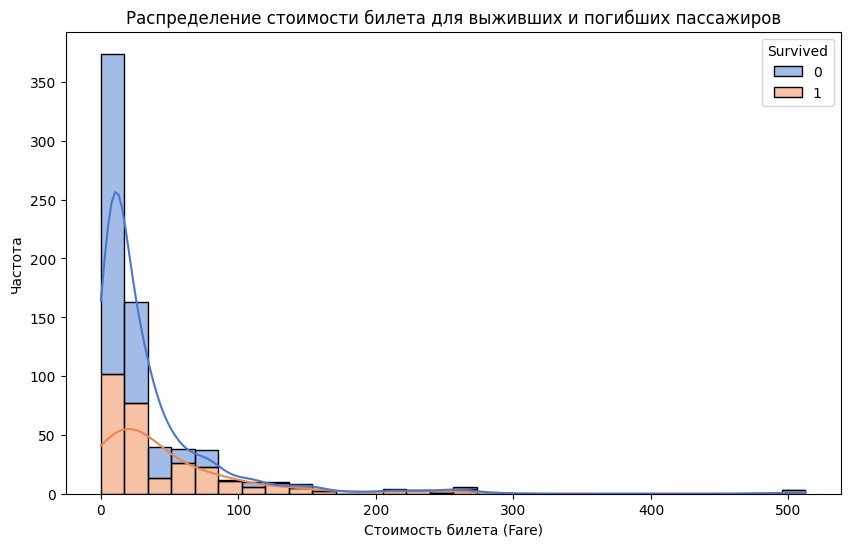

In [29]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.histplot(data=titanic_cleaned, x='Fare', hue='Survived', kde=True, multiple="stack", bins=30, palette="muted")

plt.title('Распределение стоимости билета для выживших и погибших пассажиров')
plt.xlabel('Стоимость билета (Fare)')
plt.ylabel('Частота')

plt.show()


7. Сформируйте набор признаков (X). Сформируйте вектор целевых значений (y).

In [32]:

import pandas as pd
from sklearn.datasets import load_breast_cancer
from sklearn.preprocessing import StandardScaler


cancer = load_breast_cancer()


scaler = StandardScaler()
scaled_data = scaler.fit_transform(cancer.data)

cancer_df_scaled = pd.DataFrame(scaled_data, columns=cancer.feature_names)
cancer_df_scaled["target"] = cancer.target


X = cancer_df_scaled[cancer.feature_names]
y = cancer_df_scaled['target']


print("Признаки (X):")
print(X.head())
print("\nЦелевой вектор (y):")
print(y.head())


Признаки (X):
   mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
0     1.097064     -2.073335        1.269934   0.984375         1.568466   
1     1.829821     -0.353632        1.685955   1.908708        -0.826962   
2     1.579888      0.456187        1.566503   1.558884         0.942210   
3    -0.768909      0.253732       -0.592687  -0.764464         3.283553   
4     1.750297     -1.151816        1.776573   1.826229         0.280372   

   mean compactness  mean concavity  mean concave points  mean symmetry  \
0          3.283515        2.652874             2.532475       2.217515   
1         -0.487072       -0.023846             0.548144       0.001392   
2          1.052926        1.363478             2.037231       0.939685   
3          3.402909        1.915897             1.451707       2.867383   
4          0.539340        1.371011             1.428493      -0.009560   

   mean fractal dimension  ...  worst radius  worst texture  worst perimeter  

## Предсказательная модель

8. Разделите набор данных на два, одни для обучения модели другой для проверки. Тестовый набор должен содержать 25 процентов данных.

In [33]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

print(f"Размер обучающего набора X: {X_train.shape}")
print(f"Размер тестового набора X: {X_test.shape}")
print(f"Размер обучающего набора y: {y_train.shape}")
print(f"Размер тестового набора y: {y_test.shape}")


Размер обучающего набора X: (426, 30)
Размер тестового набора X: (143, 30)
Размер обучающего набора y: (426,)
Размер тестового набора y: (143,)


9. Выполните обучение модели.

In [34]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

model = LogisticRegression(max_iter=1000, random_state=42)

model.fit(X_train, y_train)

y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)

print(f"Точность модели: {accuracy * 100:.2f}%")


Точность модели: 97.90%


## Проверка модели

10. Выведите мартицу ошибок

In [36]:
from sklearn.metrics import confusion_matrix, accuracy_score

y_pred = model.predict(X_test)

## Вывод матрицы ошибок
conf_matrix = confusion_matrix(y_test, y_pred)
print("\nМатрица ошибок:")
print(conf_matrix)



Матрица ошибок:
[[53  1]
 [ 2 87]]


11. Расчитайте accuracy

In [37]:
from sklearn.model_selection import train_test_split

accuracy = accuracy_score(y_test, y_pred)
print("\nТочность модели (Accuracy):", round(accuracy, 2))


Точность модели (Accuracy): 0.98


12. Сделайте вывод о полученном результате

Вывод:

## Вопросы для защиты

1. Сформулируйте задачу классификации.
2. Перечислите типы классификации.
3. В чем особенность несбалансированной классификации?
4. В чем особенность мультиклассовой классификации?
5. В чем особенность бинарной классификации?
6. В чем особенность классификации по нескольким меткам?
7. Чем стратегия "Один против всех" отличается от стратегии "Один против одного"?
8. Что такое матрица ошибок (несоответствий)?
9. Как рассчитывается Accuracy?
10. Объясните алгоритм классификации K-ближайших соседей.